# Ultrasonic Flowmeter Fault Detection - 8 path

![alt text](taqa-neyveli.jpg)

## Table of Contents  - 

1. **Introduction - Problem Understanding & Description** . 
   - Project Motive .
   - Company Overview . 
   - Scenario Description . 
   - Role of Ultrasonic Flowmeter . 
   - Problem Description .
   - Dataset & its Description .
2. **Raw Data Analysis** .
   - Data Cleaning .
   - Preliminary model to check Tradeoff . 
   - Handling the problem of Overfitting .
3. **Final Data Analysis** . 
   - EDA (Solving the problem of outliers & skewness ) & others . 
   - Model Building - Different models & their respective cross-validation scores .
   - Pickle Serialization & Model Testing .
4. **Conclusion** .
   
 


### Project Motive -

The underlying motive of this project is to **solve the problem of frequent Power Cuts in TamilNadu** .The problem to be stated was observed my me during my visit to **TAQA Neyveli Power Company as an Inplant Trainee in the month of January-2020.**

### Company Overview -

**TAQA Neyveli Power Company is a lignite-fired power plant which operates at 250 MW** , located in Neyveli in the Cuddalore district of Tamil Nadu, approximately 210 km south of Chennai. The plant has been in operation since 2002 and  has **produced 1,301 GWh of power in 2019**. Governing establishment TAQA is responsible for the maintenance of the plant and related facilities. The lignite is sourced from an adjoining opencast lignite mine through a long-term fuel supply agreement. **All of the power generated is supplied to TANGEDCO(Tamil Nadu Generation and Distribution Corporation Limited) under a 30 year power purchase agreement**.

### Scenario Description - 

![alt text](usm-process-flow-corrected.jpg)

We will talk about only the details of the coloured boxes in the above figure beacuse they only involve the water cycles . Firstly the **Box enclosed in Orange** .
1. It is called a **DM (Demineralization) Plant** whose primary job is to **feed purified water** into the boiler (the one in the middle of the whole image above) wherein the input water goes through its water cycle.
2. There is a usage of filter/membrane as compared to RO filters : material is anions-filled upto 60-70% of the tank.
3. Raw water collected by the borewells goes through different stages of purification namely - 
   - Dual Media Filter (DMF) - Solid particle filteration . 
   - Activated Carbon Filter (ACF) - Removes odour .
   - Fed with Strong Acid Cation (SAC) resins . 
   - Degasser Tower (DGT) - Removes CO2 .
   - Strong Base Anion (SBA -1A,2A) - Anion filteration . 
   - Mixed Bed (MB) - Consists of strong acid cation exchange and strong base anion exchange resin.
   - Other filters (A,B,C) - Silica filteration . 
   
   
Secondly the **Box enclosed in Green** .
1. Conventionally called the Output Production unit . 
2. Boiler output is the conversion of water to steam for the turbine process where the pressure (P)=175 bar & Temperature (T) = 540 degree C . 
3. Water stages that goes through in the boiler are - water -> steam -> vapour -> superheated vapour . 
4. The ouput production unit consists of the following turbines - 
   - High Pressure (HP) Turbine .
   - Intermediate Pressure (IP) Turbine .
   - Low Pressure (LP) Turbine .
5. The turbines operate at 3000 rpm for production . 

**Inference:** From the above mentioned text measurement of a fluid such as water / any other of its states is of utmost importance while dealing with the net output production at every preliminary level  . 

### Role of Ultrasonic Flowmeter - 

![alt text](ultrasonic-flow-meter.jpg)

**What is an Ultrasonic Flowmeter ?** -  
- An ultrasonic flow meter can be defined as, a meter that is used to **measure liquid velocity with ultrasound to analyze the volume of liquid flow**. This is a volumetric flow meter that needs bubble or minute particles within the liquid flow. These meters are suitable in the applications of wastewater but they will not work with drinking/distill water. So this type of flow meter is ideal for the applications wherever chemical compatibility, low maintenance, and low-pressure drop are required.Like mechanical flow meters, these meters do not include moving parts.

![alt text](ultrasonic-flow-meter-construction.jpg)

**Ultrasonic Flow Meter Working Principle** - 
- An ultrasonic flow meter construction can be done by using upstream and downstream transducers, sensor pipe and reflector. The working principle of ultrasonic flow meter is, it uses sound waves to resolve the velocity of a liquid within a pipe. There are two conditions in the pipe like no flow and flowing. In the first condition, the frequencies of ultrasonic waves are transmitted into a pipe & its indications from the fluid are similar. In the second condition, the reflected wave’s frequency is dissimilar because of the Doppler Effect.Whenever the liquid flows in the pipe quickly, then the frequency shift can be increased linearly. The transmitter processes the signals from the wave & its reflections determine the flow rate. Transit time meters transmit & receive ultrasonic waves in both the directions within the pipe. At no-flow condition, the time taken to flow in between upstream & downstream in between the transducers is the same.

- Under these two flowing conditions, the wave at upstream will flow with less speed than the downstream wave. As the liquid flows faster, the distinction between the up & downstream times raises. The times of the upstream & downstream processed by the transmitter to decide the flow rate.

**Problem Description-**
- Company uses only the volume flow rate measured by the Ultrasonic Flowmeters via its sensors to determine whether to switch meters / retain them in action . 
- Since , it is not possible to have a constant pump supply 24*7 fluctuations are always present .
- Technicians working in the company by their experience would have set a threshold of some value in the SCADA (Supervisory control and Data Acquisition) software to intimate them of sudden shootups / drop downs .
- We aim to resolve this issue by using our model in real time & suggest instrument changes at the earlier stages for improved supply & power production .

### DataSet & Description - 

**NOTE:** 
- Original dataset  couldn't be obtained as it is **licensed under the Government of TamilNadu**.
- Link to used Dataset & Description (Meter A & its attributes) : [Ultrasonic Flowmeter Diagnostics](https://archive.ics.uci.edu/ml/datasets/Ultrasonic+flowmeter+diagnostics)

## Raw Data Analysis

## 1. Data Acquisition

### Importing Required Packages

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from scipy.stats import zscore
from sklearn import preprocessing 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
data=pd.read_csv("Meter A.csv")

In [4]:
print(f"Shape of DataFrame : {data.shape}")

print(f"Top 5 Records - \n")
data.head()

Shape of DataFrame : (87, 37)
Top 5 Records - 



,Flat Ratio,Symmetry,Crossflow,FV1,FV2,FV3,FV4,FV5,FV6,FV7,...,G42,G51,G52,G61,G62,G71,G72,G81,G82,State
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945143,...,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1


In [5]:
print(f"Bottom 5 Records - \n")
data.tail()

Bottom 5 Records - 



,Flat Ratio,Symmetry,Crossflow,FV1,FV2,FV3,FV4,FV5,FV6,FV7,...,G42,G51,G52,G61,G62,G71,G72,G81,G82,State
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,...,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,2
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,...,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,2
84,0.793471,1.009560,1.001110,2.691553,3.431744,3.364790,2.717383,2.700560,3.432876,3.374046,...,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,2
85,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,3.381779,...,32.555338,33.774415,33.302410,36.640627,36.699218,35.859377,35.849610,33.816732,33.011067,2
86,0.790194,1.004195,0.995537,1.781262,2.247824,2.234980,1.785612,1.767456,2.261254,2.239285,...,32.623697,33.709312,33.362632,36.650392,36.679690,35.844725,35.841472,33.668622,33.118488,2


**Inference:** On analysing the shape of dataframe **(87,37)** , we get a feel of maybe we would more likely **overfit** the model.To confirm we will run a preliminary model in the coming cells to decide for the same .

In [6]:
print("Datatype Report - \n")
data.dtypes

Datatype Report - 



Flat Ratio    float64
Symmetry      float64
Crossflow     float64
FV1           float64
FV2           float64
FV3           float64
FV4           float64
FV5           float64
FV6           float64
FV7           float64
FV8           float64
S1            float64
S2            float64
S3            float64
S4            float64
S5            float64
S6            float64
S7            float64
S8            float64
av speed      float64
G11           float64
G12           float64
G21           float64
G22           float64
G31           float64
G32           float64
G41           float64
G42           float64
G51           float64
G52           float64
G61           float64
G62           float64
G71           float64
G72           float64
G81           float64
G82           float64
State           int64
dtype: object

In [7]:
print(f"Description Report - \n")
data.describe()

Description Report - 



,Flat Ratio,Symmetry,Crossflow,FV1,FV2,FV3,FV4,FV5,FV6,FV7,...,G42,G51,G52,G61,G62,G71,G72,G81,G82,State
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,...,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,0.824482,1.012743,0.997459,4.682436,5.754454,5.650059,4.689737,4.739781,5.746312,5.648517,...,32.506978,34.023157,33.205913,36.667715,36.791768,35.946106,35.920962,34.256859,32.913075,1.597701
std,0.018146,0.007418,0.002046,1.800595,2.224012,2.188446,1.835339,1.834655,2.218003,2.188067,...,0.097678,0.230991,0.106636,0.019964,0.078697,0.057946,0.044998,0.371358,0.141770,0.493204
min,0.790194,0.997058,0.993241,1.781262,2.247824,2.234464,1.785612,1.767456,2.261254,2.238488,...,32.267253,33.709312,33.001302,36.629232,36.678060,35.843100,35.828452,33.668622,32.641603,1.000000
25%,0.809688,1.008405,0.995865,2.855605,3.454326,3.383418,2.824120,2.873642,3.447957,3.381488,...,32.430013,33.803711,33.114420,36.658528,36.723634,35.913086,35.898437,33.907062,32.806803,1.000000
50%,0.833332,1.013437,0.997486,5.361665,6.796140,6.664992,5.431951,5.433235,6.785348,6.670478,...,32.501627,34.060872,33.172202,36.666667,36.801757,35.934243,35.913087,34.334312,32.875978,2.000000
75%,0.840179,1.018409,0.998824,5.665208,6.836397,6.711797,5.662967,5.732180,6.817800,6.725551,...,32.592775,34.121093,33.301596,36.679688,36.831870,35.983072,35.947267,34.468587,33.052572,2.000000
max,0.847096,1.028315,1.002573,8.469805,10.287437,10.128200,8.591271,8.581726,10.299377,10.113305,...,32.693685,34.627278,33.426105,36.728517,37.005208,36.127928,36.056315,35.174155,33.185218,2.000000


**Inference:** 
- We see that scales of different features are different by looking at the **mean**.
- Flat Ratio,Symmetry,Crossflow are all along the same scale,while velocities,speed,gain are at different scales.
- **Feature Scaling** could be done later to help some of the models.

### Correlation Matrix

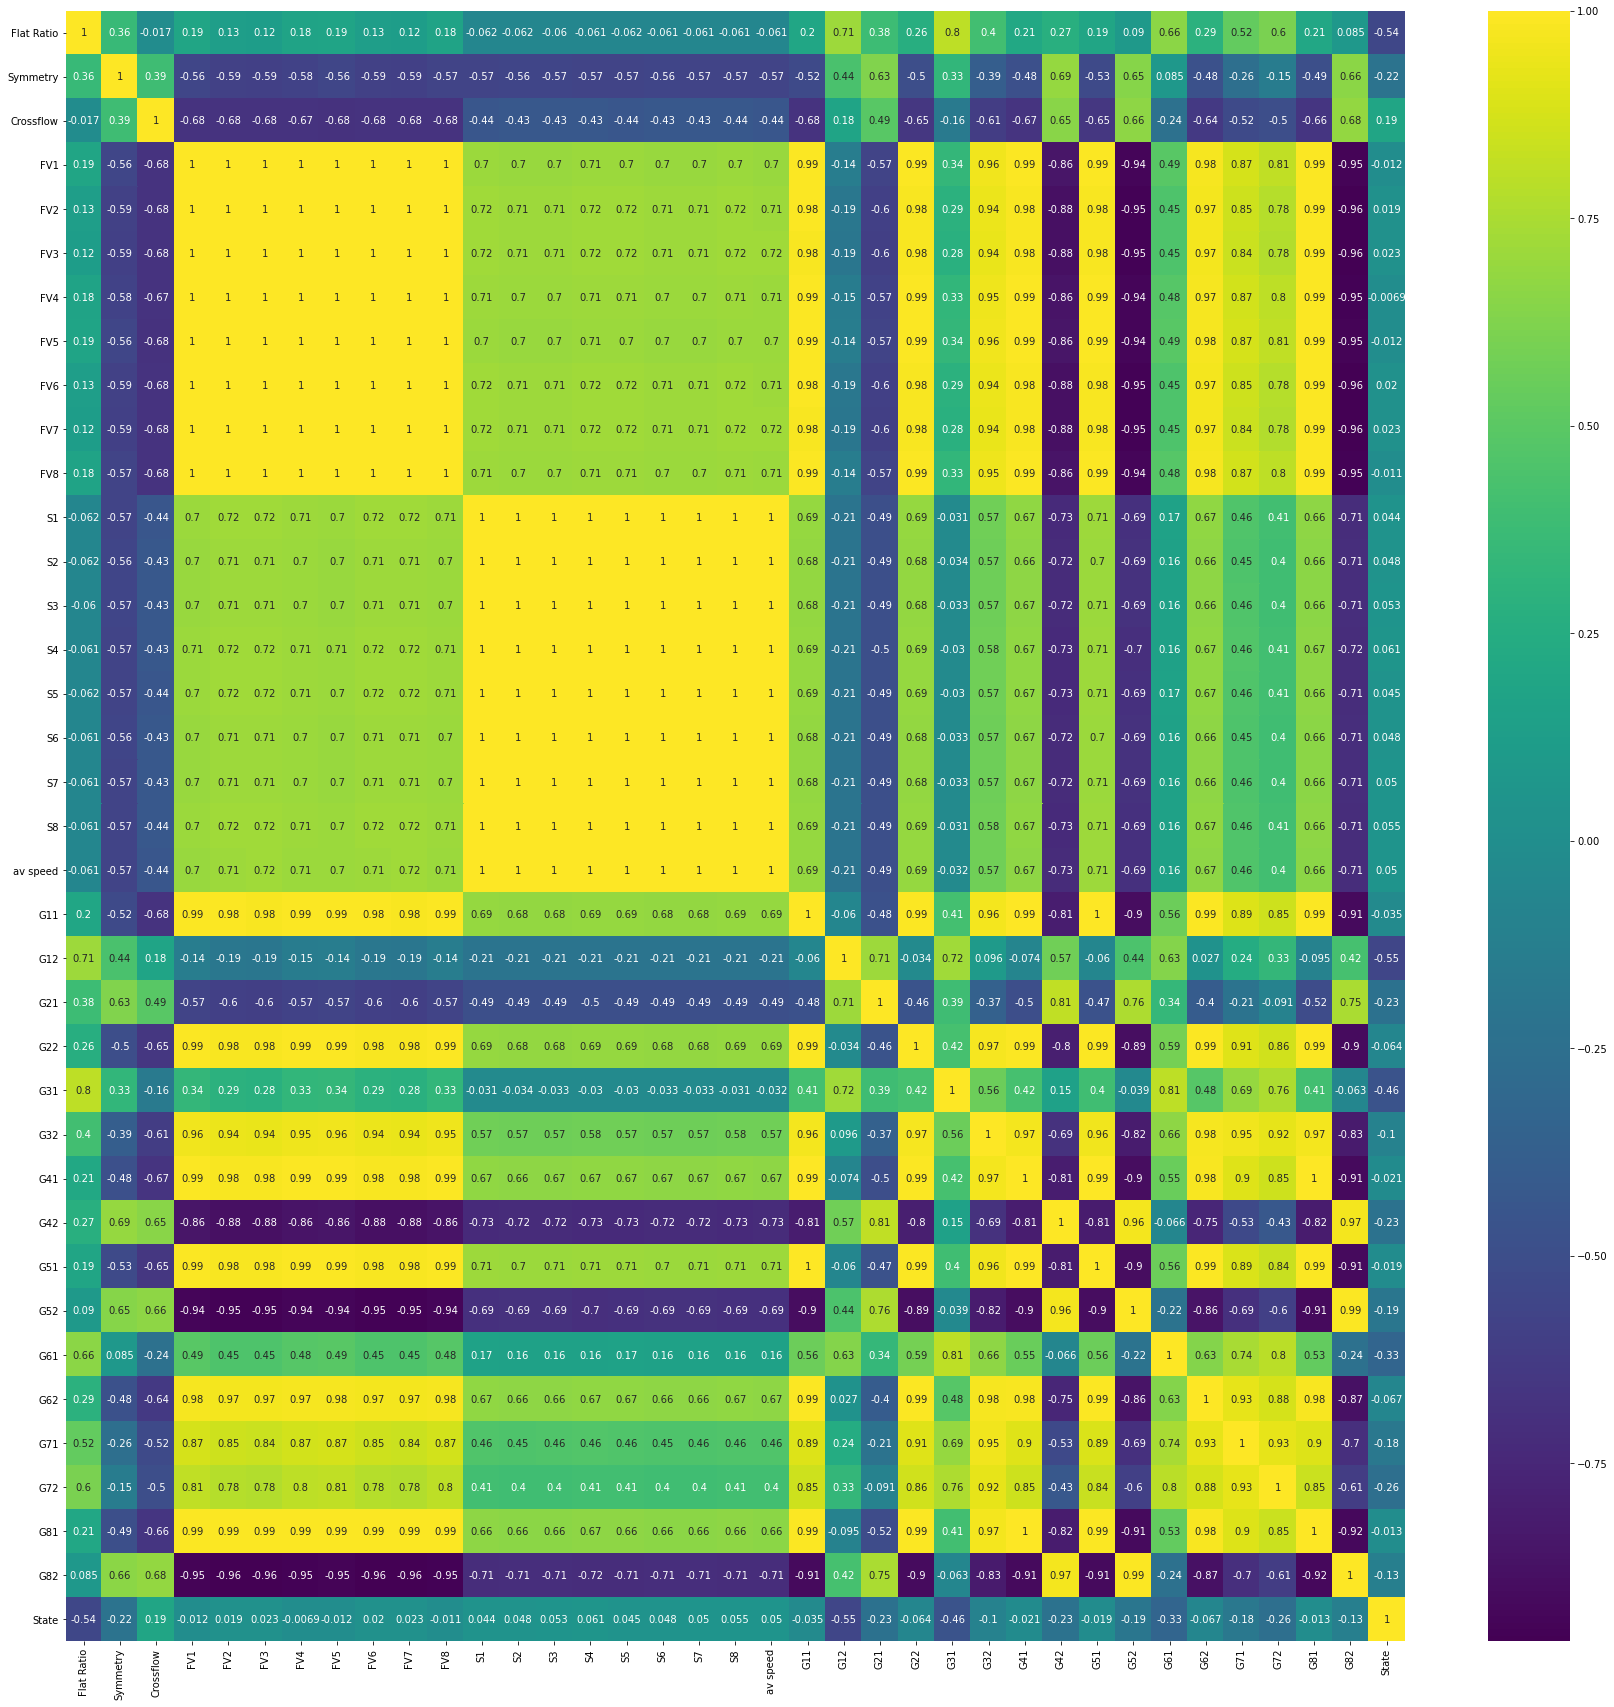

In [8]:
corrMatrix = data.corr()
fig_dims=(30,30)
fig,ax=plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix,annot=True,cmap="viridis",ax=ax)
plt.show()

**Inference:** Obviously the number of features is very large & we will figure out a way to create a **new feature** or **drop** some of them. 

### Running a Preliminary Model to check Tradeoff

We will define the tradeoff as the difference between the Dev & Test scores.
(ie) **Tradeoff = Dev_score - Test_score**

In [9]:
x = np.array(data.drop(["State"],1))
y = np.array(data["State"])

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,Y_train)
lr_cv=np.mean(cross_val_score(lr,X_train,Y_train, scoring = 'f1', cv= 3))
print("Model : Logistic Regression \n")
print(f"CV Score- :{lr_cv}")

Y_pred=lr.predict(X_test)
lr_test=accuracy_score(Y_pred,Y_test)
print(f"Test Score- :{lr_test}")

tradeoff=lr_test-lr_cv
print(f"Tradeoff- :{tradeoff}")

Model : Logistic Regression 

CV Score- :0.1111111111111111
Test Score- :0.5
Tradeoff- :0.3888888888888889


**Inference:** 
- As we see from the above scores - **Both the CV & Test scores are very bad** & the **tradeoff is also very high**.
- We will deal with **methods of reducing overfitting** in the following cells.

## 2. Data Cleaning

### Common Methods to Reduce Overfitting - 
1. **Reduce Number of Features**
2. **Get more training examples**

**NOTE:** The following code has already been run & executed and saved in a different CSV File. The respective files will be added in the Github repository for visualization.

### 1. Reduce Number of Features

**NOTE:** Explanation for each line of code is being commented out with an hashtag at the top of each code.

In [10]:
'''
#Dropping S1-S8 because there is a separate column named "avg speed" which is the average of S1-S8.
#Average values are more or less similar to the values in individual columns & wouldn't hurt our performance.
data.drop(["S1","S2","S3","S4","S5","S6","S7","S8"],axis=1,inplace=True)


#Peforming one-hot-encoding for our target variable "State".
state_dummies={1:0,2:1}
data["State"]=data["State"].map(state_dummies)


#We create a feature "avg flowvelocity" by setting it to be the mean from FV1-FV8.
#Again as mentioned above - Average values are more or less similar to the values in individual columns & wouldn't hurt our performance.
col_fv = data.loc[: , "FV1":"FV8"]
data["avg flowvelocity"] = col_fv.mean(axis=1)

#We drop the corresponding columns FV1-FV8.
data.drop(["FV1","FV2","FV3","FV4","FV5","FV6","FV7","FV8"],axis=1,inplace=True)


#We create a feature "avg gain" by setting it to be the mean from G11-G82.
#Again as mentioned above - Average values are more or less similar to the values in individual columns & wouldn't hurt our performance.
col_gain = data.loc[: , "G11":"G82"]
data["avg gain"] = col_gain.mean(axis=1)

#We drop the corresponding columns G11-G82.
data.drop(data.loc[:,"G11":"G82"],axis=1,inplace=True)


#Converting the cleaned data into a different CSV File.
corrected=data
corrected.to_csv("final.csv",index=False)
'''

'\n#Dropping S1-S8 because there is a separate column named "avg speed" which is the average of S1-S8.\n#Average values are more or less similar to the values in individual columns & wouldn\'t hurt our performance.\ndata.drop(["S1","S2","S3","S4","S5","S6","S7","S8"],axis=1,inplace=True)\n\n\n#Peforming one-hot-encoding for our target variable "State".\nstate_dummies={1:0,2:1}\ndata["State"]=data["State"].map(state_dummies)\n\n\n#We create a feature "avg flowvelocity" by setting it to be the mean from FV1-FV8.\n#Again as mentioned above - Average values are more or less similar to the values in individual columns & wouldn\'t hurt our performance.\ncol_fv = data.loc[: , "FV1":"FV8"]\ndata["avg flowvelocity"] = col_fv.mean(axis=1)\n\n#We drop the corresponding columns FV1-FV8.\ndata.drop(["FV1","FV2","FV3","FV4","FV5","FV6","FV7","FV8"],axis=1,inplace=True)\n\n\n#We create a feature "avg gain" by setting it to be the mean from G11-G82.\n#Again as mentioned above - Average values are more

**Inference:**
- Created new features **avg flowvelocity & avg gain** to take the averages of all the flowvelocities & gains in all the subpaths under all paths.
- Dropped columns S1-S8 as the dataset already had its averages calculated under "av speed".
- Dropped columns FV1-FV8 & G11-G82 after the creation of new features mentioned above.

### 2. Get more training examples

**NOTE:** We choose to do Data Augmentation by **Generating Noise** & performing **Random Sampling** of the existing training examples.

In [11]:
'''
#Reading in the cleaned dataset.
df=pd.read_csv("final.csv")
clean_signal = df
clean_signal.shape

#Adding Gaussian Noise while retaining the dimensions of the dataset.
mu,sigma=0,0.1
noise = np.random.normal(mu, sigma, [clean_signal.shape[0],clean_signal.shape[1]])
signal=clean_signal + noise
signal.shape

#Converting the noise processed data into a different CSV File.
signal.to_csv("corrected.csv",index=False)
'''

'\n#Reading in the cleaned dataset.\ndf=pd.read_csv("final.csv")\nclean_signal = df\nclean_signal.shape\n\n#Adding Gaussian Noise while retaining the dimensions of the dataset.\nmu,sigma=0,0.1\nnoise = np.random.normal(mu, sigma, [clean_signal.shape[0],clean_signal.shape[1]])\nsignal=clean_signal + noise\nsignal.shape\n\n#Converting the noise processed data into a different CSV File.\nsignal.to_csv("corrected.csv",index=False)\n'

**Inference:** We add **Gaussian noise** to **preserve the distribution & dimensions of the feature variables** . Gaussian Noise is set & generated between mu=0 & sigma=0.1 by choosing a random number within the constraints.

## Final Data Analysis

**NOTE:** The CSV file **corrected.csv** containing the noise data has been **manually added** to the earlier preprocessed CSV file **final.csv**.

## 1. Data Acquisition - 

### (a) Reading & Preliminary Dataset View

In [13]:
df_final=pd.read_csv("final.csv")
print(f"Shape of DataFrame : {df_final.shape}")

print(f"Top 5 Records - \n")
print(df_final.head())

Shape of DataFrame : (174, 7)
Top 5 Records - 

   Flat_Ratio  Symmetry  Crossflow     av_speed  State  avg_flowvelocity  \
0    0.841499  1.009367   0.993816  1485.391229      0          9.350917   
1    0.842250  1.006584   0.996605  1485.919896      0          8.323063   
2    0.840723  1.011647   0.998152  1485.903146      0          7.273721   
3    0.841119  1.017807   0.996812  1484.790938      0          6.214215   
4    0.840358  1.016534   0.996221  1484.252875      0          6.209143   

    avg_gain  
0  35.064189  
1  34.975281  
2  34.920553  
3  34.878133  
4  34.882507  


In [14]:
print(f"Bottom 5 Records - \n")
print(df_final.tail())

Bottom 5 Records - 

     Flat_Ratio  Symmetry  Crossflow     av_speed  State  avg_flowvelocity  \
169    0.691361  1.136155   1.113885  1484.816640      1          2.980241   
170    0.756440  1.079829   0.998233  1484.576481      1          3.116105   
171    0.974662  0.912941   0.898646  1484.515224      1          2.936713   
172    0.748386  0.997063   1.088544  1484.454586      1          3.310467   
173    0.941076  0.934164   0.945006  1484.356057      1          1.917877   

      avg_gain  
169  34.624133  
170  34.580059  
171  34.765090  
172  34.658567  
173  34.759954  


### (b) Datatype Viewing

In [15]:
print("Datatype Report - \n")
print(df_final.dtypes)

Datatype Report - 

Flat_Ratio          float64
Symmetry            float64
Crossflow           float64
av_speed            float64
State                 int64
avg_flowvelocity    float64
avg_gain            float64
dtype: object


### (c) Getting idea about dataframe

In [15]:
print(f"Description Report - \n")
print(df_final.describe())

Description Report - 

       Flat_Ratio    Symmetry   Crossflow     av_speed       State  \
count  174.000000  174.000000  174.000000   174.000000  174.000000   
mean     0.827864    1.006474    0.993318  1484.951734    0.597701   
std      0.068931    0.072535    0.063334     0.815328    0.491777   
min      0.645209    0.773813    0.803101  1483.718669    0.000000   
25%      0.795369    0.995050    0.993592  1484.458360    0.000000   
50%      0.833257    1.010752    0.997533  1484.720629    1.000000   
75%      0.845067    1.022031    1.001573  1485.126096    1.000000   
max      1.130920    1.298201    1.141518  1487.638625    1.000000   

       avg_flowvelocity    avg_gain  
count        174.000000  174.000000  
mean           5.198278   34.828883  
std            2.016250    0.098672  
min            1.917877   34.580059  
25%            3.123112   34.761021  
50%            6.054705   34.819463  
75%            6.227446   34.876480  
max            9.546431   35.132461  


## 2. Exploratory Data Analysis (EDA) 

### (a) Visualizing Correlation-matrix

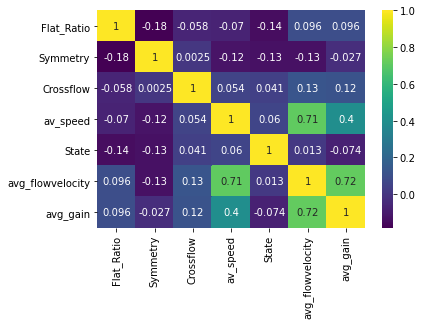

In [16]:
corrMatrix = df_final.corr()
sns.heatmap(corrMatrix,annot=True,cmap="viridis")
plt.show()

**Inference:** Most significant correlation takeaways are -
- av_speed & avg_flowvelocity about **0.71**.
- av_speed & avg_gain about **0.4**.
- av_flowvelocity & avg_gain about **0.72**.
- **Explanation** - In Physics terminology,Speed is a **scalar quantity** which specifies the rate at which distance is changing but does not specify in which direction. Velocity is a **vector quantity** which specifies both speed and direction. So speed is the magnitude of velocity (the length of the vector). Breaking down into simpler terms the influence of flow of water through the meter is of atmost importance than any other factors beacause both **speed & flowvelocity affect the gain at the meter ends**. 

### (b) Feature Correlation with Jointplots 

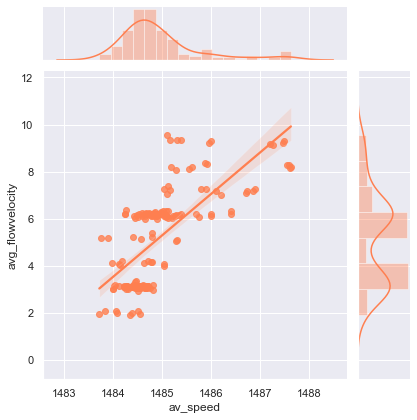

In [20]:
sns.set(style="darkgrid")
sns.jointplot("av_speed", "avg_flowvelocity", data=df_final, kind="reg",color="coral")

**Inference:** As explained earlier speed is the magnitude of velocity (length of velocity vector). No suprises in observing the increasing linear dependencies.

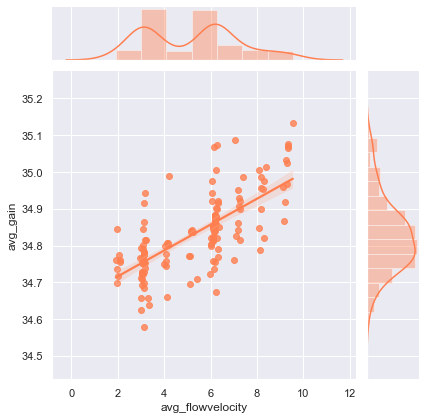

In [21]:
sns.set(style="darkgrid")
sns.jointplot("avg_flowvelocity", "avg_gain", data=df_final, kind="reg",color="coral")

**Inference:** Same explanation as above,no suprises altogether that both the flowvelocities & speeds affect the gains at the meter ends.

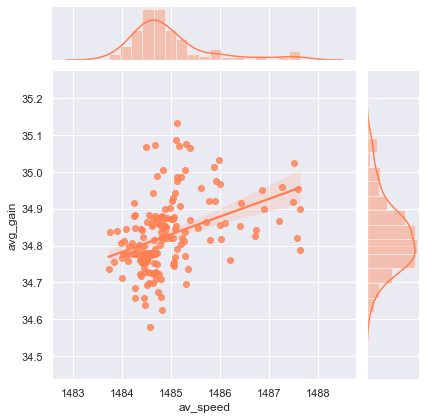

In [19]:
sns.set(style="darkgrid")
sns.jointplot("av_speed", "avg_gain", data=df_final, kind="reg",color="coral")

**Inference:** Same explanation as above,no suprises that the speed affects the gains at the meter ends.

### (c) Countplot for the Target variable

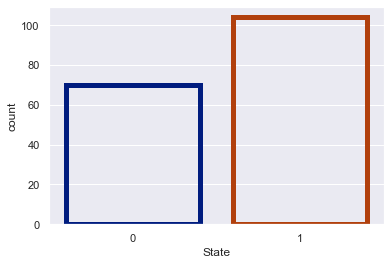

In [24]:
sns.countplot(x='State', data=df_final,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

**Inference:** 
- **We don't observe any imbalance** in the target variable.
- Number of 0's state ~= 3/4th of the number of 1's state. So we are good.

### (d) Boxplot Visualization for Outliers

Numerical-Continuous Features count :7


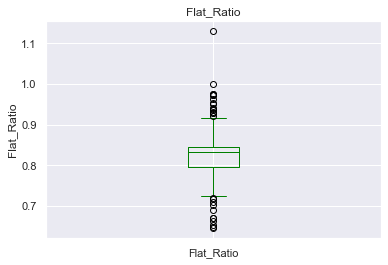

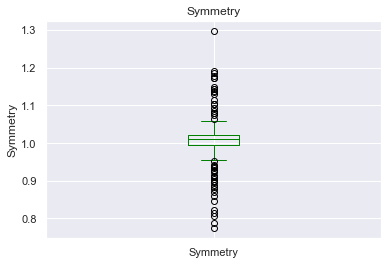

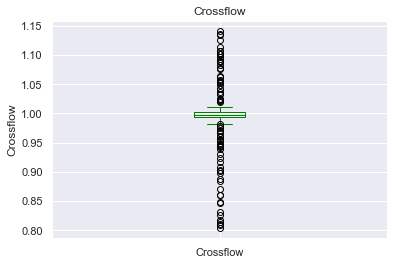

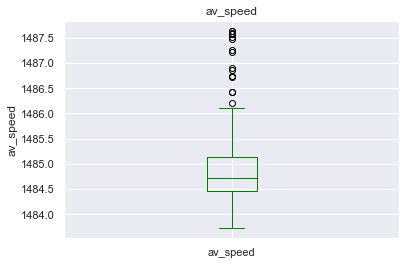

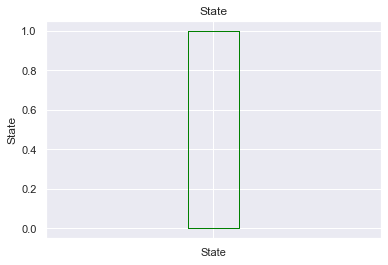

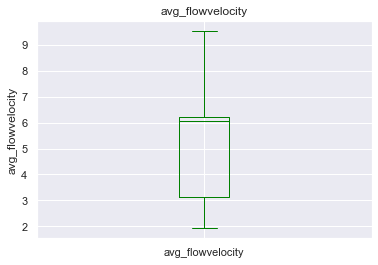

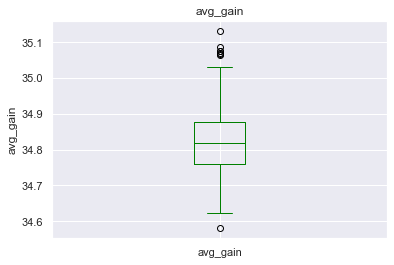

In [21]:
continuous_features = [feature for feature in df_final.columns if df_final[feature].dtypes != 'O']
print(f"Numerical-Continuous Features count :{len(continuous_features)}")

for feature in continuous_features:
    df_final.boxplot(column=feature,color="Green")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

**Inference:** 
- Features with large outliers by boxplot - Flat_Ratio, Symmetry, Crossflow.
- Features with negligible outliers by boxplot - av_speed, avg_flowvelocity, avg_gain

### (e) Identifying Outliers using Z-Score & Printing them

In [25]:
from scipy import stats
z = np.abs(stats.zscore(df_final))
print(z)

[[1.98377324e-01 3.99910972e-02 7.88153746e-03 ... 1.21889880e+00
  2.06552943e+00 2.39162056e+00]
 [2.09310992e-01 1.51492791e-03 5.20478820e-02 ... 1.21889880e+00
  1.55427331e+00 1.48796663e+00]
 [1.87093445e-01 7.15155316e-02 7.65369050e-02 ... 1.21889880e+00
  1.03232877e+00 9.31717261e-01]
 ...
 [2.13577793e+00 1.29321907e+00 1.49910976e+00 ... 8.20412654e-01
  1.12490667e+00 6.48380547e-01]
 [1.15633045e+00 1.30125773e-01 1.50788451e+00 ... 8.20412654e-01
  9.39000424e-01 1.73106394e+00]
 [1.64713480e+00 9.99772158e-01 7.65018004e-01 ... 8.20412654e-01
  1.63167729e+00 7.00587148e-01]]


In [26]:
threshold = 3
print(np.where(z > 3))

(array([ 17,  18,  69,  96, 104, 105, 116, 123, 125, 137, 138, 156],
      dtype=int64), array([3, 3, 3, 1, 3, 3, 1, 0, 2, 6, 1, 3], dtype=int64))


**Inference:** 
- We set the threshold at 3 because most of the values **lie within 3 standard deviations from the mean** & anything beyond is predominantly an outlier.
- We see that there are **12 outliers** being predicted. We will leave it as it is & build our model. If in case we get a poor Cross-validation score we will come back & deal with it.

### (f) Plotting Distribution Plots for Skewed cases

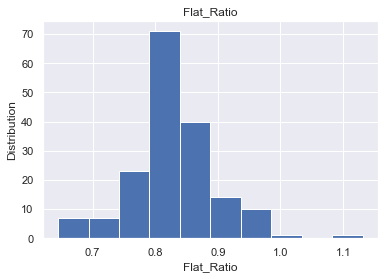

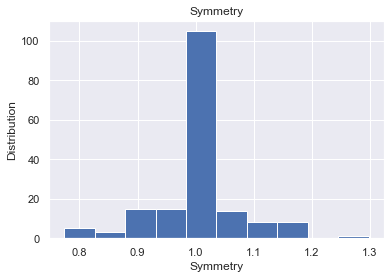

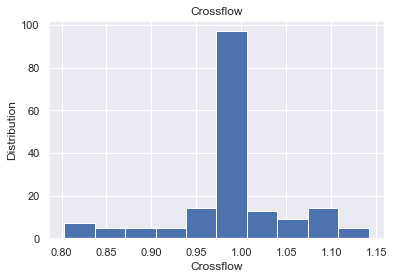

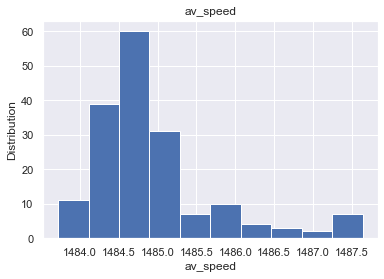

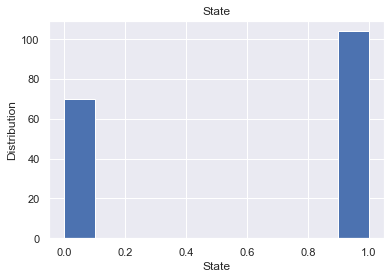

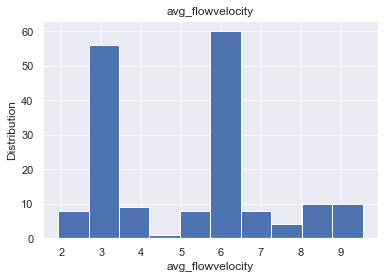

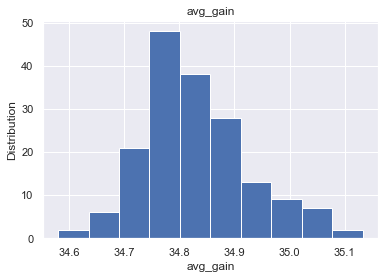

In [25]:
for feature in continuous_features:
    df_final[feature].hist()
    plt.xlabel(feature)
    plt.ylabel("Distribution")
    plt.title(feature)
    plt.show()

### Handling Skewness of data by Log Transformation

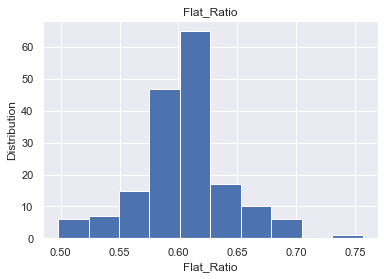

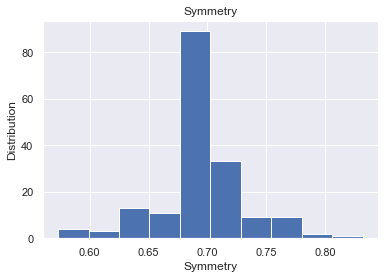

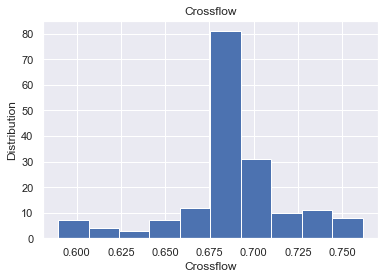

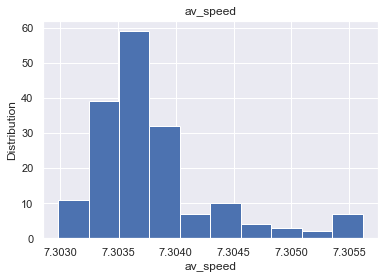

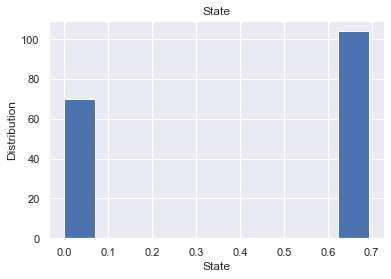

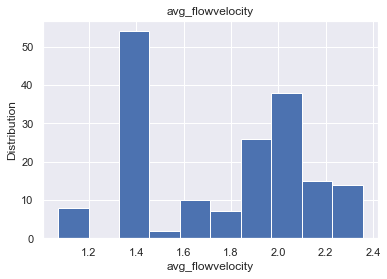

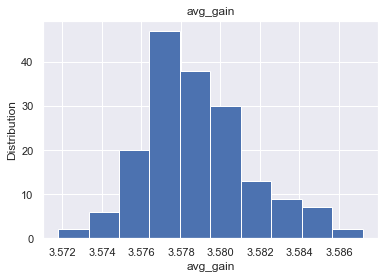

In [26]:
for feature in continuous_features:
    df_final[feature].apply(lambda x:np.log(x+1)).hist()
    plt.xlabel(feature)
    plt.ylabel("Distribution")
    plt.title(feature)
    plt.show()   

**Inference:** We have converted the skewed-distribution into a Gaussian-distribution for simplicity by applying Log Transformation.

### (g) Distribution & Dependency of every feature with the Target variable

### 1. Flat_Ratio - 

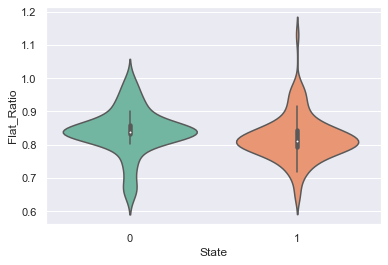

In [27]:
sns.violinplot(x="State", y="Flat_Ratio",data=df_final, palette="Set2", split=True)

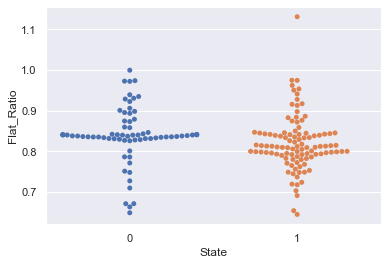

In [28]:
sns.swarmplot(x='State', y='Flat_Ratio', data=df_final)

**Inference:**
- "State 1" is being predicted **most often** when the "Flat_Ratio" is around 0.75 - 0.85. Concluded from the **density space**.
- Single outlier at "State=1" when "Flat_Ratio" is around 1.1 + is neglected.

### 2. Symmetry - 

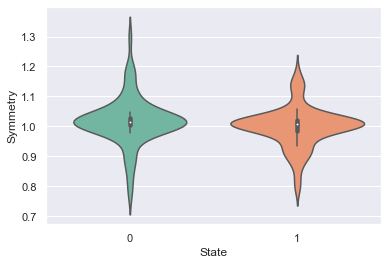

In [29]:
sns.violinplot(x="State", y="Symmetry",data=df_final, palette="Set2", split=True)

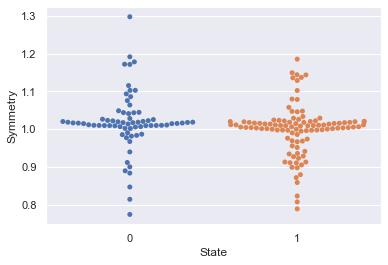

In [30]:
sns.swarmplot(x='State', y='Symmetry', data=df_final)

**Inference:**
- Looks like the "Symmetry" feature is **not much of a deal** in the prediction of the "State". Density space around "Symmetry" being around 1.0 - 1.1 concludes the same.
- Single outlier at "State=0" when "Symmetry" is around 1.3 is neglected.

### 3. Crossflow - 

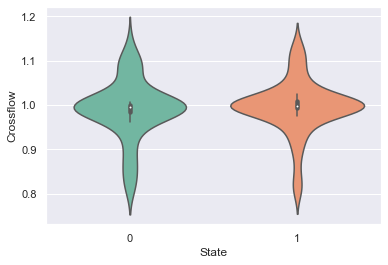

In [31]:
sns.violinplot(x="State", y="Crossflow",data=df_final, palette="Set2", split=True)

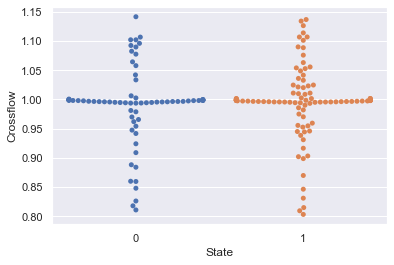

In [32]:
sns.swarmplot(x='State', y='Crossflow', data=df_final)

**Inference:** "Crossflow" contribution with respect to the determination of "State" is pretty much **balanced**.

### 4. Average Speed - 

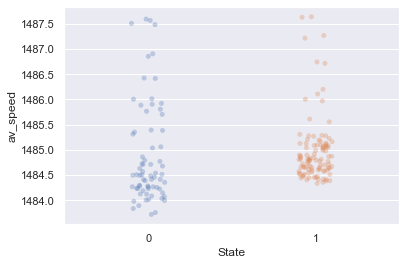

In [33]:
sns.stripplot(x='State', y='av_speed', data=df_final, alpha=0.3, jitter=True)

**Inference:**
- "State" 1 is observed only when the "av_speed" is around **1484.3** . 
- While "State" 0 is observed right when the "av_speed" is around **1484.0**. This shows how sensitive determination of "State" is with respect to the "av_speed".

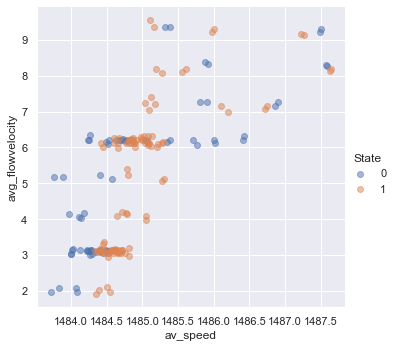

In [34]:
sns.lmplot(x='av_speed', y='avg_flowvelocity', hue='State', data=df_final, fit_reg=False, scatter_kws={'alpha':0.5})

**Inference:** 
- At earlier stages of "av_speed" that is from 1484 - 1484.5 around **90% are "State" 0**.
- At middle stages  of "av_speed" that is from 1484.5 - 1485.5 around **90% are "State" 1**.
- At last stages of "av_speed" that is from 1485.5 + predictions seem pretty **balanced**.

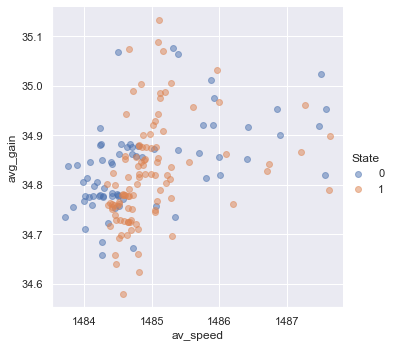

In [35]:
sns.lmplot(x='av_speed', y='avg_gain', hue='State', data=df_final, fit_reg=False, scatter_kws={'alpha':0.5})

**Inference:** Same as the inference stated in the above cell.

### 5. Average Flowvelocity  - 

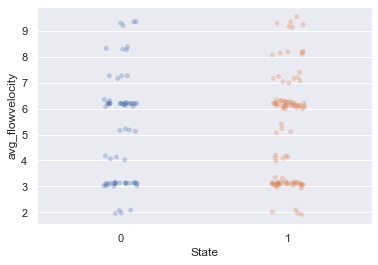

In [36]:
sns.stripplot(x='State', y='avg_flowvelocity', data=df_final, alpha=0.3, jitter=True)

**Inference:** Influence of "avg_flowvelocity" in the determination of "State" is pretty much **balanced**.

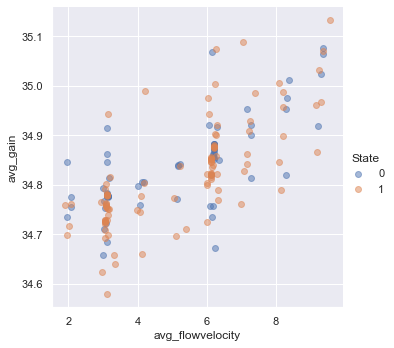

In [37]:
sns.lmplot(x='avg_flowvelocity', y='avg_gain', hue='State', data=df_final, fit_reg=False, scatter_kws={'alpha':0.5})

**Inference:** As explained before we observe an **increasing linear dependencies** with "avg_flowvelocity" & "avg_gain".

### 6. Average Gain - 

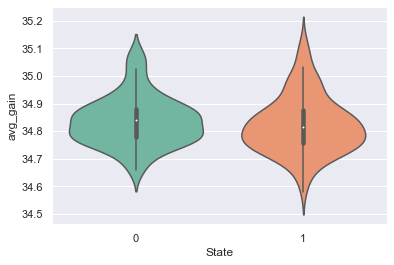

In [38]:
sns.violinplot(x="State", y="avg_gain",data=df_final, palette="Set2", split=True)

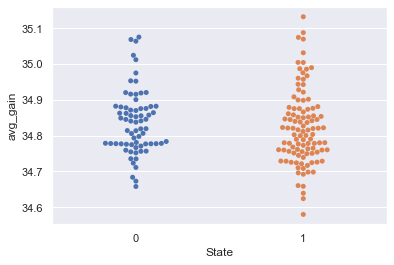

In [39]:
sns.swarmplot(x='State', y='avg_gain', data=df_final)

### (h) Pairplot Plotting

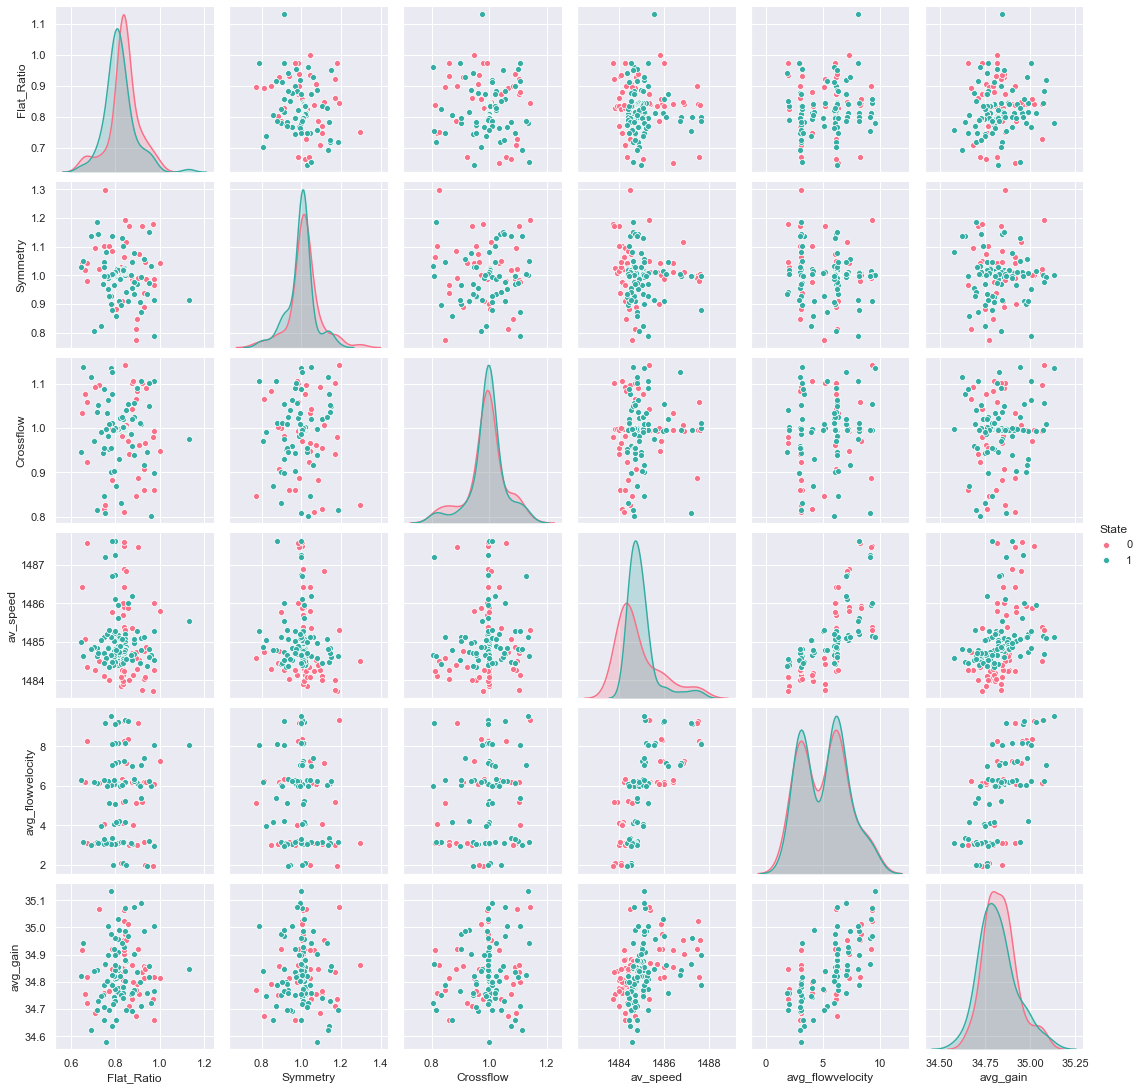

In [40]:
sns.pairplot(df_final, hue='State',palette="husl")

## 3. Model Building

In [27]:
x = np.array(df_final.drop(["State"],1))
y = np.array(df_final["State"])

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Model Phases - 

**NOTE:** We will use **F1 score** as our evaluation metric for our binary classification problem since it is an **harmonic mean of Precision & Recall - key to calculating False positives etc** helping us to device a solution at the end & by far it is more **robust** .

**Model-1 : Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,Y_train)
lr_cv=np.mean(cross_val_score(lr,X_train,Y_train,scoring='f1',cv=3))
print(f"Logistic Regression :{lr_cv}")

Logistic Regression :0.7452452452452453


**Model-2 : K Nearest Neigbors**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_cv=np.mean(cross_val_score(knn,X_train,Y_train, scoring = 'f1', cv= 3))
print(f"K Nearest Neigbors :{knn_cv}")

K Nearest Neigbors :0.7526625932427203


**Model-3 : Support Vector Machines**

In [44]:
from sklearn import svm
svm=svm.SVC(max_iter=3000)
svm.fit(X_train,Y_train)
svm_cv=np.mean(cross_val_score(svm,X_train,Y_train, scoring = 'f1', cv= 3))
print(f"Support Vector Machines :{svm_cv}")

Support Vector Machines :0.7533933933933934


**Model-4 : Linear SVC**

In [45]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
linear_svc_cv=np.mean(cross_val_score(linear_svc,X_train,Y_train, scoring = 'f1', cv= 3))
print(f"Linear SVC :{linear_svc_cv}")

Linear SVC :0.5011411411411412


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Model-5 : Random Forest Classifier**

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_cv=np.mean(cross_val_score(rf,X_train,Y_train, scoring = 'f1', cv= 3))
print(f"Random Forest Classifier :{rf_cv}")

Random Forest Classifier :0.8152239709443099


**Model-6 : Decision Tree Classifier**

In [47]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train,Y_train)
decisiontree_cv=np.mean(cross_val_score(decisiontree,X_train,Y_train, scoring = 'f1', cv= 3))
print(f"Decision Tree Classifier :{decisiontree_cv}")

Decision Tree Classifier :0.8119239319019735


**Model-7 : Stochastic Gradient Descent Classifier**

In [48]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
sgd_cv=np.mean(cross_val_score(sgd,X_train,Y_train, scoring = 'f1', cv= 3))
print(f"Stochastic Gradient Classifier :{sgd_cv}")

Stochastic Gradient Classifier :0.5011411411411412


**Model-8 : Gaussian Naive Bayes**

In [49]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
gaussian_cv=np.mean(cross_val_score(gaussian,X_train,Y_train, scoring = 'f1', cv= 3))
print(f"Gaussian Naive Bayes :{gaussian_cv}")

Gaussian Naive Bayes :0.6787794756965297


### Boosting Models - 

**Model-9 : Gradient Boosting Classifier**

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
gbc_cv=np.mean(cross_val_score(gbc,X_train,Y_train, scoring = 'f1', cv= 3))
print(f"Gradient Boosting Classifier :{gbc_cv}")

Gradient Boosting Classifier :0.7999011007911937


**Model-10 : XG Boost**

In [51]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
xgb_cv=np.mean(cross_val_score(xgb,X_train,Y_train, scoring = 'f1', cv= 3))
print(f"XG Boost :{xgb_cv}")

XG Boost :0.8346560846560847


**Model-11 : Ada Boost**

In [52]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adb.fit(X_train,Y_train)
adb_cv=np.mean(cross_val_score(adb,X_train,Y_train, scoring = 'f1', cv= 3))
print(f"Ada Boost :{adb_cv}")

Ada Boost :0.8108881568001065


**Model Summary**

In [53]:
models_dict = {"Models": ["Logistic Regression","K Nearest Neighbors","Support Vector Machines","Linear SVC","Random Forest Classifier","Decison Tree Classifier","Stochastic Gradient Descent","Gaussian Naive Bayes ","Gradient Boosting Classifier","XG Boost","Ada Boost"],"Score": [lr_cv,knn_cv,svm_cv,linear_svc_cv,rf_cv,decisiontree_cv,sgd_cv,gaussian_cv,gbc_cv,xgb_cv,adb_cv]}
models_summary=DataFrame(models_dict)
summary=models_summary.sort_values(["Score"],ascending=[False])
print(summary)

                          Models     Score
9                       XG Boost  0.834656
4       Random Forest Classifier  0.815224
5        Decison Tree Classifier  0.811924
10                     Ada Boost  0.810888
8   Gradient Boosting Classifier  0.799901
2        Support Vector Machines  0.753393
1            K Nearest Neighbors  0.752663
0            Logistic Regression  0.745245
7          Gaussian Naive Bayes   0.678779
3                     Linear SVC  0.501141
6    Stochastic Gradient Descent  0.501141


## 4. Serialization & Model Testing

### (a) Pickle-Serialization

In [54]:
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(xgb,pickle_out)
pickle_out.close()


y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
print(f"XG Boost Predictions -")
print(predictions)

XG Boost Predictions -
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]


### (b) Model Testing

In [55]:
from sklearn.metrics import f1_score
Y_pred=xgb.predict(X_test)
test_score=f1_score(Y_test,Y_pred)
print(f"XG Boost Test Accuracy : {test_score}")

XG Boost Test Accuracy : 0.9268292682926829


## Conclusion - 

**By using this model in real time analysis over a period of time and getting the False Positives from our confusion matrix , the company can set a more practical threshold , thus helping them to identify faults at an earlier stages which would concretely increase the rate of power production.This would be very helpful for the people of TamilNadu as power cuts are more common during  summers & people suffer greatly from this.**